In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
CCBL = pd.read_csv('home-credit-default-risk\credit_card_balance.csv')

In [3]:
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,23.00,Active,0,0
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,"273,093.97","273,093.97",2.00,2,0.00,0.00,18.00,Active,0,0
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


SK_ID_PREV: "ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed

SK_ID_CURR: ID of loan in our sample,hashed

MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date) (khoảng cách của khoản vay gần nhất trước đấy)

AMT_BALANCE: Balance during the month of previous credit (số dư của kì)

AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit (giới hạn lượng tiền của credit card của kì

AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit (số tiền rút ra tại ATM của kì)

AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit (số tiền rút ra của kì)

AMT_DRAWINGS_OTHER_CURRENT: Amount of other drawings during the month of the previous credit (số tiền rút ra từ các nguồn khác của kì)

AMT_DRAWINGS_POS_CURRENT: Amount drawing or buying goods during the month of the previous credit (số tiền rút ra hoặc sử dụng mua của kì )

AMT_INST_MIN_REGULARITY: Minimal installment for this month of the previous credit (lượng tiền trả góp tối thiểu phải trả của kì tín dụng)

AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit (lượng tiền khách hàng trả trong kì)

AMT_PAYMENT_TOTAL_CURRENT: How much did the client pay during the month in total on the previous credit (tổng lượng tiền khách hàng trả trong kì)

AMT_RECEIVABLE_PRINCIPAL: Amount receivable for principal on the previous credit (lượng tiền bị thu đối với số tiền gốc trong kì)

AMT_RECIVABLE: Amount receivable on the previous credit (lượng tiền bị thu

AMT_TOTAL_RECEIVABLE: Total amount receivable on the previous credit (tổng lượng tiền bị thu)

CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit (số lần rút tiền tại ATM trong kì)

CNT_DRAWINGS_CURRENT: Number of drawings during this month on the previous credit (số lần rút tiền trong kì)

CNT_DRAWINGS_OTHER_CURRENT Number of other drawings during this month on the previous credit (số lần rút tiền bằng các cách khác trong kì)

CNT_DRAWINGS_POS_CURRENT: Number of drawings for goods during this month on the previous credit (số lần rút tiền POS trong kì)

CNT_INSTALMENT_MATURE_CUM: Number of paid installments on the previous credit (số lần trả góp trong kì)

NAME_CONTRACT_STATUS: "Contract status (active signed,...) on the previous credit" (tình trạng của hợp đồng)

SK_DPD: DPD (Days past due) during the month on the previous credit (số ngày quá hạn trong kì)

SK_DPD_DEF: DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit (số ngày quá hạn trong kì ???)


In [4]:
CCBL.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0


In [5]:
CCBL.sort_values(by= "SK_ID_CURR")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
584804,1489396,100006,-1,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1399895,1489396,100006,-4,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
520387,1489396,100006,-2,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1636141,1489396,100006,-6,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
655566,1489396,100006,-5,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049726,1794451,456250,-2,"158,266.93",175500,0.00,0.00,0.00,0.00,"8,477.73",...,"158,266.93","158,266.93",0.00,0,0.00,0.00,9.00,Active,0,0
2248506,1794451,456250,-7,"174,435.89",180000,0.00,0.00,0.00,0.00,"9,240.70",...,"174,435.89","174,435.89",0.00,0,0.00,0.00,4.00,Active,0,0
3734047,1794451,456250,-9,"180,536.76",180000,0.00,0.00,0.00,0.00,"9,653.99",...,"179,866.26","179,866.26",0.00,0,0.00,0.00,2.00,Active,0,0
140639,1794451,456250,-1,"153,832.73",175500,0.00,0.00,0.00,0.00,"8,286.39",...,"153,832.73","153,832.73",0.00,0,0.00,0.00,10.00,Active,0,0


In [6]:
CCBL.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [7]:
CCBL.duplicated().sum()

0

In [8]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(CCBL)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

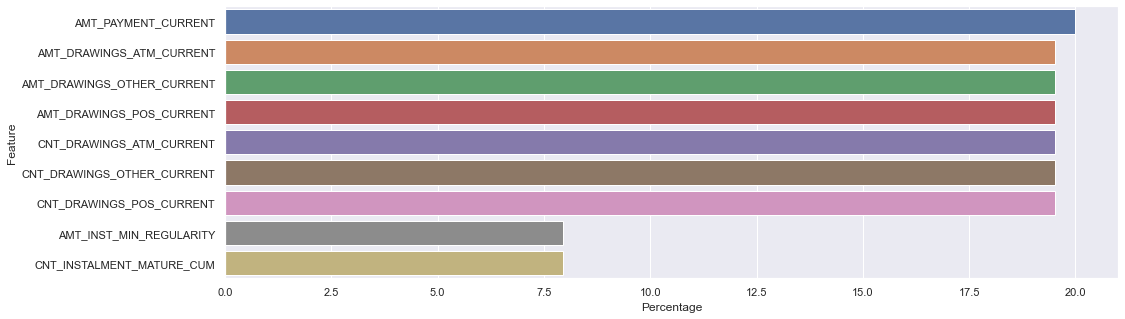

In [9]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [10]:
#Fillna
CCBL.fillna(0, inplace=True)

In [11]:
CCBL.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [12]:
# tổng lượng tiền rút ra
CCBL['AMT_DRAWING_SUM'] = CCBL['AMT_DRAWINGS_ATM_CURRENT'] + CCBL['AMT_DRAWINGS_CURRENT'] + CCBL['AMT_DRAWINGS_OTHER_CURRENT'] + CCBL['AMT_DRAWINGS_POS_CURRENT']
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWING_SUM
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,1,0.00,1.00,35.00,Active,0,0,"1,755.00"
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0,"4,500.00"
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0,0.00
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0,"4,500.00"
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0,"23,094.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,Active,0,0,0.00
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,23.00,Active,0,0,0.00
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,"273,093.97",2.00,2,0.00,0.00,18.00,Active,0,0,"540,000.00"
3840310,1624872,430337,-10,0.00,450000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,Active,0,0,0.00


In [13]:
CCBL['CNT_DRAWING_SUM'] = CCBL['CNT_DRAWINGS_ATM_CURRENT'] + CCBL['CNT_DRAWINGS_CURRENT'] + CCBL['CNT_DRAWINGS_OTHER_CURRENT'] + CCBL['CNT_DRAWINGS_POS_CURRENT'] + CCBL['CNT_INSTALMENT_MATURE_CUM']
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWING_SUM,CNT_DRAWING_SUM
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,1,0.00,1.00,35.00,Active,0,0,"1,755.00",37.00
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,1.00,1,0.00,0.00,69.00,Active,0,0,"4,500.00",71.00
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,0.00,0,0.00,0.00,30.00,Active,0,0,0.00,30.00
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,1.00,1,0.00,0.00,10.00,Active,0,0,"4,500.00",12.00
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,0.00,1,0.00,1.00,101.00,Active,0,0,"23,094.00",103.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0.00,0.00,0.00,Active,0,0,0.00,0.00
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0.00,0.00,23.00,Active,0,0,0.00,23.00
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,2.00,2,0.00,0.00,18.00,Active,0,0,"540,000.00",22.00
3840310,1624872,430337,-10,0.00,450000,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0.00,0.00,0.00,Active,0,0,0.00,0.00


In [14]:
CCBL["Completed_Flag"] = CCBL["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
CCBL["COMPLETE_CNT"] = CCBL.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
CCBL.drop(["Completed_Flag"], axis=1, inplace= True)
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWING_SUM,CNT_DRAWING_SUM,COMPLETE_CNT
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,1,0.00,1.00,35.00,Active,0,0,"1,755.00",37.00,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,1,0.00,0.00,69.00,Active,0,0,"4,500.00",71.00,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,0,0.00,0.00,30.00,Active,0,0,0.00,30.00,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,1,0.00,0.00,10.00,Active,0,0,"4,500.00",12.00,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,1,0.00,1.00,101.00,Active,0,0,"23,094.00",103.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,Active,0,0,0.00,0.00,0
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,23.00,Active,0,0,0.00,23.00,0
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,2,0.00,0.00,18.00,Active,0,0,"540,000.00",22.00,0
3840310,1624872,430337,-10,0.00,450000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,Active,0,0,0.00,0.00,0


In [15]:
CCBL[CCBL["SK_ID_CURR"] == 276642]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWING_SUM,CNT_DRAWING_SUM,COMPLETE_CNT
17,1039039,276642,-6,0.00,67500,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,33.00,Completed,0,0,0.00,33.00,32
4804,1370304,276642,-6,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,Active,0,0,0.00,0.00,32
39504,1039039,276642,-89,0.00,67500,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,6.00,Active,0,0,0.00,6.00,32
93095,1039039,276642,-21,0.00,67500,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,33.00,Completed,0,0,0.00,33.00,32
145873,1039039,276642,-5,0.00,67500,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,33.00,Completed,0,0,0.00,33.00,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566852,1370304,276642,-2,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,Active,0,0,0.00,0.00,32
3582109,1039039,276642,-66,67.50,67500,0.00,0.00,0.00,0.00,67.50,...,0,0.00,0.00,28.00,Active,0,0,0.00,28.00,32
3706024,1039039,276642,-28,0.00,67500,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,33.00,Completed,0,0,0.00,33.00,32
3820270,1039039,276642,-79,"27,995.76",67500,0.00,0.00,0.00,0.00,"3,375.00",...,0,0.00,0.00,15.00,Active,0,0,0.00,15.00,32


In [16]:
## get the most recent record of this dataset
CCBL_filter = CCBL.groupby(["SK_ID_CURR"]).agg({'MONTHS_BALANCE': ['max'],
                                                'AMT_BALANCE' : ['sum','mean','max'],
                                                'AMT_CREDIT_LIMIT_ACTUAL' : ['sum','mean','max'],
                                                'AMT_DRAWINGS_ATM_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_OTHER_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_POS_CURRENT' : ['sum','max'],
                                                'AMT_INST_MIN_REGULARITY' : ['mean','min','max'],
                                                'AMT_PAYMENT_CURRENT' : ['mean','min','max'],
                                                'AMT_PAYMENT_TOTAL_CURRENT' : ['mean','min','max'],
                                                'AMT_RECEIVABLE_PRINCIPAL' : ['sum','mean','max'],
                                                'AMT_RECIVABLE' : ['sum','mean','max'],
                                                'AMT_TOTAL_RECEIVABLE' : ['sum','mean','max'],
                                                'CNT_DRAWINGS_ATM_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_OTHER_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_POS_CURRENT' : ['sum','max'],
                                                'CNT_INSTALMENT_MATURE_CUM' : ['sum','max','min'],
                                                'SK_DPD' : ['sum','max'],
                                                'SK_DPD_DEF' : ['sum','max'],
                                                'AMT_DRAWING_SUM' : ['sum','max'],
                                                'CNT_DRAWING_SUM' : ['sum','max'],
                                                "COMPLETE_CNT":["first"]})
CCBL_filter

MONTHS_BALANCE  AMT_BALANCE                        \
                      max          sum       mean        max   
SK_ID_CURR                                                     
100006                 -1         0.00       0.00       0.00   
100011                 -2 4,031,676.23  54,482.11 189,000.00   
100013                 -1 1,743,352.25  18,159.92 161,420.22   
100021                 -2         0.00       0.00       0.00   
100023                 -4         0.00       0.00       0.00   
...                   ...          ...        ...        ...   
456244                 -1 5,405,223.96 131,834.73 453,627.67   
456246                 -2   105,093.85  13,136.73  43,490.11   
456247                 -2 2,205,557.64  23,216.40 190,202.13   
456248                 -2         0.00       0.00       0.00   
456250                 -1 2,083,071.92 173,589.33 200,208.92   

           AMT_CREDIT_LIMIT_ACTUAL                     \
                               sum       mean     max   
SK_ID_CURR                                              
100006                     1620000 270,000.00  270000   
100011                    12150000 164,189.19  180000   
100013                    12645000 131,718.75  157500   
100021                    11475000 675,000.00  675000   
100023                     1080000 135,000.00  225000   
...                            ...        ...     ...   
456244                    12150000 296,341.46  450000   
456246                     1080000 135,000.00  135000   
456247                    13680000 144,000.00  180000   
456248                    20700000 900,000.00  900000   
456250                     2146500 178,875.00  180000   

           AMT_DRAWINGS_ATM_CURRENT            AMT_DRAWINGS_CURRENT  ...  \
                                sum        max                  sum  ...   
SK_ID_CURR                                                           ...   
100006                         0.00       0.00                 0.00  ...   
100011                   180,000.00 180,000.00           180,000.00  ...   
100013                   571,500.00 157,500.00           571,500.00  ...   
100021                         0.00       0.00                 0.00  ...   
100023                         0.00       0.00                 0.00  ...   
...                             ...        ...                  ...  ...   
456244                 1,003,500.00 279,000.00         1,100,537.91  ...   
456246                         0.00       0.00           121,594.05  ...   
456247                   202,950.00  96,750.00           204,203.11  ...   
456248                         0.00       0.00                 0.00  ...   
456250                   180,000.00 171,000.00           180,000.00  ...   

           CNT_INSTALMENT_MATURE_CUM SK_DPD     SK_DPD_DEF      \
                                 min    sum max        sum max   
SK_ID_CURR                                                       
100006                          0.00      0   0          0   0   
100011                          0.00      0   0          0   0   
100013                          0.00      1   1          1   1   
100021                          0.00      0   0          0   0   
100023                          0.00      0   0          0   0   
...                              ...    ...  ..        ...  ..   
456244                          0.00      0   0          0   0   
456246                          0.00      0   0          0   0   
456247                          3.00      3   1          2   1   
456248                          0.00      0   0          0   0   
456250                          0.00      0   0          0   0   

           AMT_DRAWING_SUM            CNT_DRAWING_SUM       COMPLETE_CNT  
                       sum        max             sum   max        first  
SK_ID_CURR                                                                
100006                0.00       0.00            0.00  0.00            0  
100011          360,000.0

In [17]:
CCBL_filter.columns = ["CC_BAL_" + c[0] + "_" + c[1].upper() for c in CCBL_filter.columns.values.tolist()]
CCBL_filter.columns

Index(['CC_BAL_MONTHS_BALANCE_MAX', 'CC_BAL_AMT_BALANCE_SUM',
       'CC_BAL_AMT_BALANCE_MEAN', 'CC_BAL_AMT_BALANCE_MAX',
       'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM',
       'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN',
       'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX',
       'CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM',
       'CC_BAL_AMT_DRAWINGS_ATM_CURRENT_MAX',
       'CC_BAL_AMT_DRAWINGS_CURRENT_SUM', 'CC_BAL_AMT_DRAWINGS_CURRENT_MAX',
       'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_SUM',
       'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_MAX',
       'CC_BAL_AMT_DRAWINGS_POS_CURRENT_SUM',
       'CC_BAL_AMT_DRAWINGS_POS_CURRENT_MAX',
       'CC_BAL_AMT_INST_MIN_REGULARITY_MEAN',
       'CC_BAL_AMT_INST_MIN_REGULARITY_MIN',
       'CC_BAL_AMT_INST_MIN_REGULARITY_MAX', 'CC_BAL_AMT_PAYMENT_CURRENT_MEAN',
       'CC_BAL_AMT_PAYMENT_CURRENT_MIN', 'CC_BAL_AMT_PAYMENT_CURRENT_MAX',
       'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
       'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MIN',
       'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MAX

In [18]:
train_df = pd.read_csv("home-credit-default-risk\\application_train.csv")
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,"157,500.00","254,700.00","27,558.00",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,"72,000.00","269,550.00","12,001.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,"153,000.00","677,664.00","29,979.00",...,0,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,"171,000.00","370,107.00","20,205.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


# Feature

In [23]:
CCBL_merged = pd.merge(train_df[["SK_ID_CURR", "TARGET"]], CCBL_filter.reset_index(), how= "left", on=["SK_ID_CURR"])
CCBL_merged

,SK_ID_CURR,TARGET,CC_BAL_MONTHS_BALANCE_MAX,CC_BAL_AMT_BALANCE_SUM,CC_BAL_AMT_BALANCE_MEAN,CC_BAL_AMT_BALANCE_MAX,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM,...,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN,CC_BAL_SK_DPD_SUM,CC_BAL_SK_DPD_MAX,CC_BAL_SK_DPD_DEF_SUM,CC_BAL_SK_DPD_DEF_MAX,CC_BAL_AMT_DRAWING_SUM_SUM,CC_BAL_AMT_DRAWING_SUM_MAX,CC_BAL_CNT_DRAWING_SUM_SUM,CC_BAL_CNT_DRAWING_SUM_MAX,CC_BAL_COMPLETE_CNT_FIRST
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,-1.00,0.00,0.00,0.00,"1,620,000.00","270,000.00","270,000.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,100007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
CCBL_merged.fillna(0, inplace= True)

In [25]:
CCBL_merged.isnull().sum()

SK_ID_CURR                               0
TARGET                                   0
CC_BAL_MONTHS_BALANCE_MAX                0
CC_BAL_AMT_BALANCE_SUM                   0
CC_BAL_AMT_BALANCE_MEAN                  0
CC_BAL_AMT_BALANCE_MAX                   0
CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM       0
CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN      0
CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX       0
CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM      0
CC_BAL_AMT_DRAWINGS_ATM_CURRENT_MAX      0
CC_BAL_AMT_DRAWINGS_CURRENT_SUM          0
CC_BAL_AMT_DRAWINGS_CURRENT_MAX          0
CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_SUM    0
CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_MAX    0
CC_BAL_AMT_DRAWINGS_POS_CURRENT_SUM      0
CC_BAL_AMT_DRAWINGS_POS_CURRENT_MAX      0
CC_BAL_AMT_INST_MIN_REGULARITY_MEAN      0
CC_BAL_AMT_INST_MIN_REGULARITY_MIN       0
CC_BAL_AMT_INST_MIN_REGULARITY_MAX       0
CC_BAL_AMT_PAYMENT_CURRENT_MEAN          0
CC_BAL_AMT_PAYMENT_CURRENT_MIN           0
CC_BAL_AMT_PAYMENT_CURRENT_MAX           0
CC_BAL_AMT_

In [27]:
CCBL_merged.to_csv("data_preprocessed/07_credit_cash_balance.csv",index=False)